In [58]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

# Question 1:

# a)

# Let's prepare the input vectors and output vectors with N=100 and p=10:

In [288]:
N = 100 # i.e input vector size
p = 10 # i.e number of data

# Data : Input-Output generation :
random.seed(129)
X = np.array([[random.choice([-1, 1]) for i in range(N)] for j in range(p)])
Y = np.array([random.choice([-1, 1]) for j in range(p)])

# initialise weights and bias :
np.random.seed(17)
W_j = [np.random.normal(0,1) for i in range(N)]
theta = np.random.normal(0,1)

prop_correct = []

learning_iter = 0   # means number where we actually perform an update
for i in range(100) :
    for t in range(p) :
        y_hat = np.dot(W_j,X[t]) - theta
        if (np.sign(y_hat)!=Y[t]):
            W_j = W_j + Y[t] * X[t]
            theta = theta - Y[t]
            learning_iter+=1
            prop_correct.append(100*sum([np.sign(np.dot(W_j,X[j]) - theta) for j in range(p)]==Y)/p)
        
    

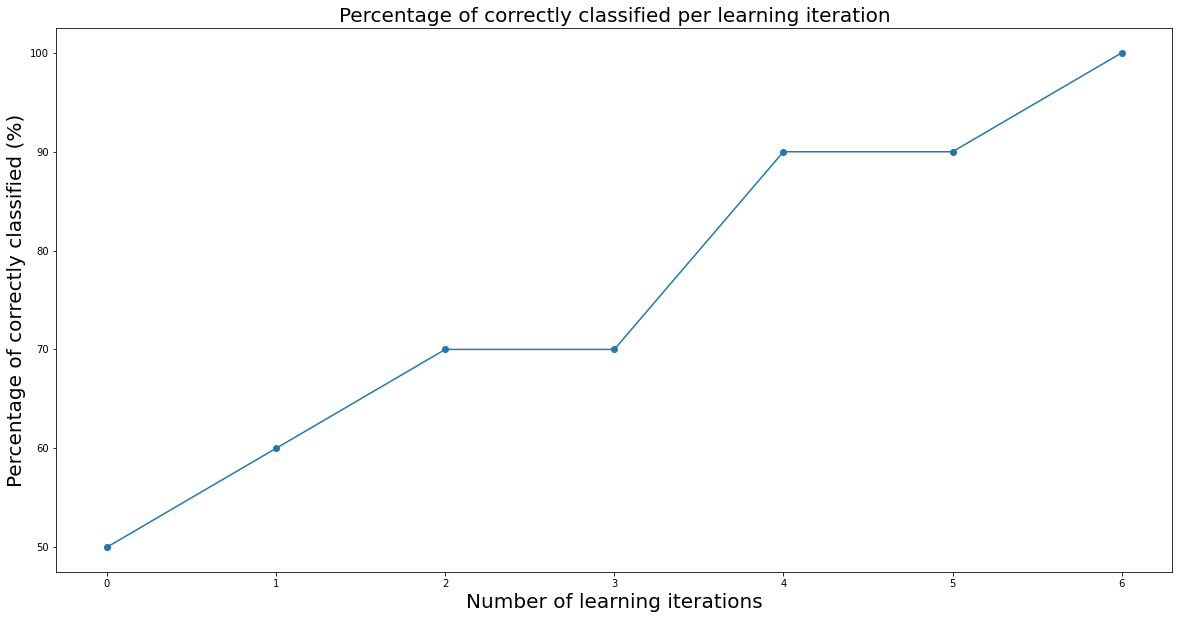

In [291]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(prop_correct,marker='o')
plt.xlabel("Number of learning iterations",size=20)
plt.ylabel("Percentage of correctly classified (%)",size=20)
plt.title("Percentage of correctly classified per learning iteration",size=20)
plt.show()

# b)

# Step 1 : get a lower and upper bound of pmax for each N to optimize the search space

In [16]:
Ns = np.linspace(100,1000,10).astype(np.int)
pmax = []


for N in Ns :
    print(N)

    p = N
    prop_correct = 100
    while (prop_correct == 100) :
        #print(prop_correct)
        p+=int(0.1*N)
        print(N,"   ", p)
        # Data : Input-Output generation :
        random.seed(129)
        X = np.array([[random.choice([-1, 1]) for i in range(N)] for j in range(p)])
        Y = np.array([random.choice([-1, 1]) for j in range(p)])
        
        # initialise weights and bias :
        np.random.seed(17)
        W_j = [np.random.normal(0,1) for i in range(N)]
        theta = np.random.normal(0,1)
        
        for i in range(100) :
            for t in range(p) :
                y_hat = np.dot(W_j,X[t]) - theta
                if (np.sign(y_hat)!=Y[t]):
                    W_j = W_j + Y[t] * X[t]
                    theta = theta - Y[t]
                    prop_correct = 100*sum([np.sign(np.dot(W_j,X[j]) - theta) for j in range(p)]==Y)/p
    pmax.append(p) 

100
100     110
100     120
100     130
100     140
100     150
100     160
100     170
200
200     220
200     240
200     260
200     280
200     300
200     320
200     340
300
300     330
300     360
300     390
300     420
300     450
300     480
400
400     440
400     480
400     520
400     560
400     600
400     640
500
500     550
500     600
500     650
500     700
500     750
600
600     660
600     720
600     780
600     840
600     900
700
700     770
700     840
700     910
700     980
700     1050
700     1120
800
800     880
800     960
800     1040
800     1120
800     1200
800     1280
900
900     990
900     1080
900     1170
900     1260
900     1350
1000
1000     1100
1000     1200
1000     1300
1000     1400
1000     1500


In [17]:
pmax

[170, 340, 480, 640, 750, 900, 1120, 1280, 1350, 1500]

# Step 2 : Use those lower and upper bounds to get exact value of pmax for each N.

In [18]:
Ns = np.linspace(100,1000,10).astype(np.int)
pmaxs = []


k=0
for N in Ns :
    print(N)
    p = pmax[k] - int(0.1*N) 
    prop_correct = 100
    while (prop_correct == 100) :
        p+=1
        print(N,"   ", p)
        # Data : Input-Output generation :
        random.seed(129)
        X = np.array([[random.choice([-1, 1]) for i in range(N)] for j in range(p)])
        Y = np.array([random.choice([-1, 1]) for j in range(p)])
        
        # initialise weights and bias :
        np.random.seed(17)
        W_j = [np.random.normal(0,1) for i in range(N)]
        theta = np.random.normal(0,1)
        
        for i in range(100) :
            for t in range(p) :
                y_hat = np.dot(W_j,X[t]) - theta
                if (np.sign(y_hat)!=Y[t]):
                    W_j = W_j + Y[t] * X[t]
                    theta = theta - Y[t]
                    prop_correct = 100*sum([np.sign(np.dot(W_j,X[j]) - theta) for j in range(p)]==Y)/p
    k+=1
    pmaxs.append(p) 

100
100     161
200
200     321
300
300     451
400
400     601
400     602
400     603
400     604
400     605
400     606
500
500     701
600
600     841
600     842
600     843
700
700     1051
700     1052
700     1053
700     1054
800
800     1201
900
900     1261
900     1262
1000
1000     1401
1000     1402


In [286]:
pmaxs = [161, 321, 451, 606, 701, 843, 1054, 1201, 1262, 1402]
Ns = np.linspace(100,1000,10).astype(np.int)

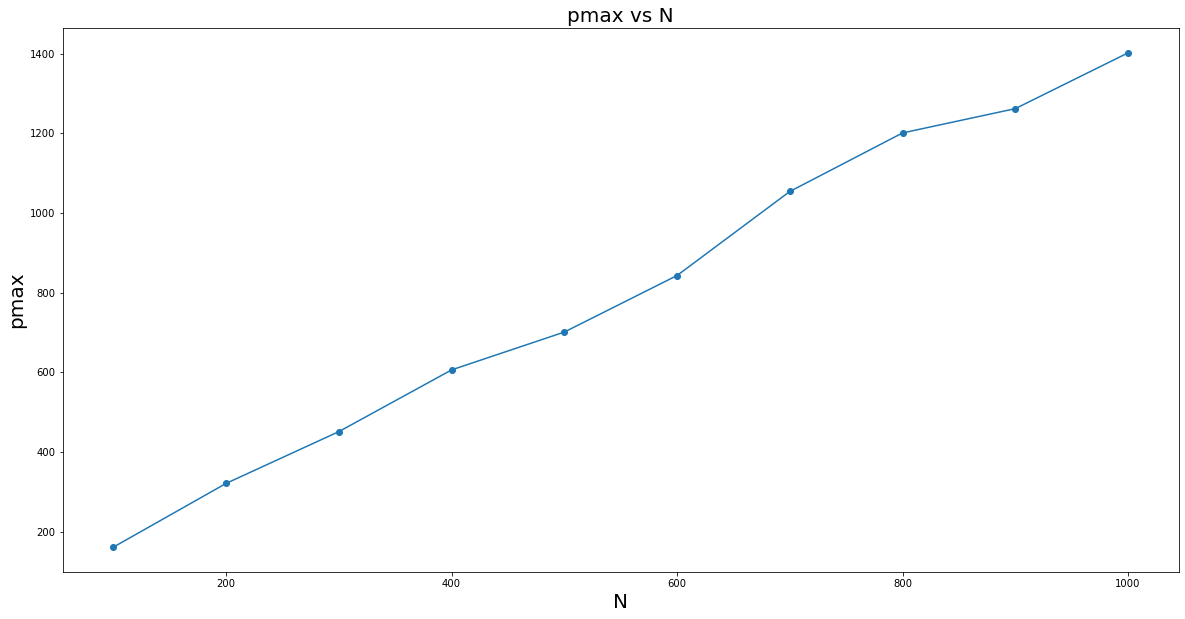

In [287]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(Ns,pmaxs,marker='o')
plt.xlabel("N",size=20)
plt.ylabel("pmax",size=20)
plt.title("pmax vs N",size=20)
plt.show()

# Question 2:

# (a,b)

Max proportion correctly classified : 76.0 %


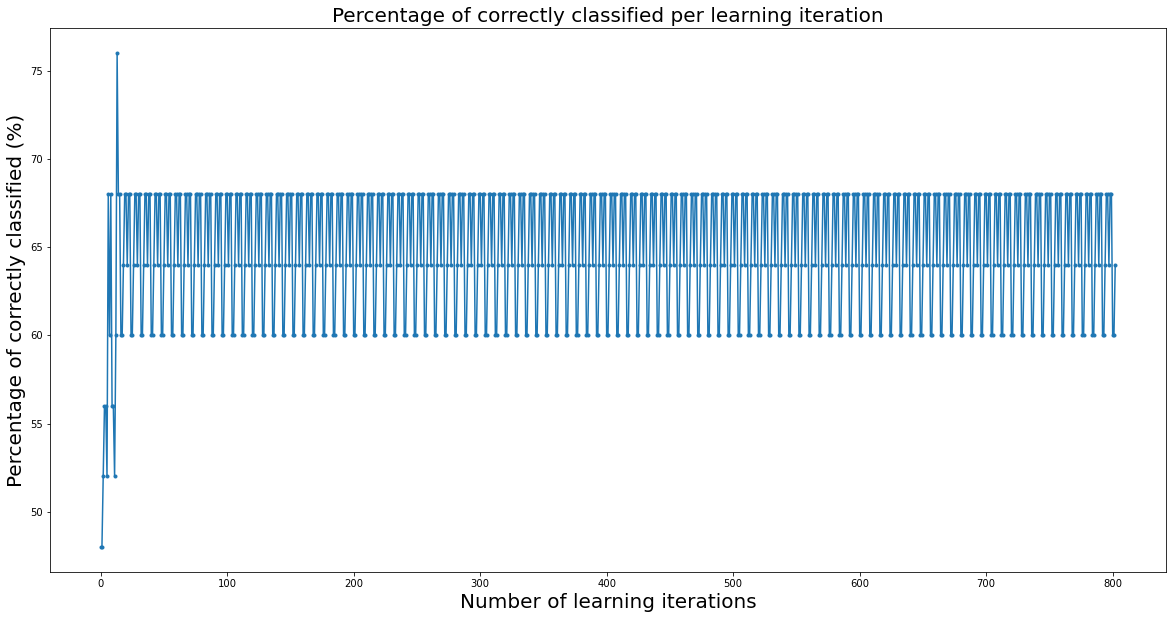

In [284]:
N = 100 # i.e input vector size
p = 5 # i.e number of data

# Data : Input-Output generation :
random.seed(129)
X_tmp = np.array([[random.choice([-1, 1]) for i in range(N)] for j in range(p**2)])
X = np.array([np.concatenate((X_tmp[i],X_tmp[j]))for i in range(p) for j in range(p)])
Y = np.array([random.choice([-1, 1]) for j in range(p**2)])

# initialise weights and bias :
np.random.seed(17)
W_j = [np.random.normal(0,1) for i in range(2*N)]
theta = np.random.normal(0,1)

prop_correct = []

learning_iter = 0   # means number where we actually perform an update
for i in range(100) :
    for t in range(p**2) :
        y_hat = np.dot(W_j,X[t]) - theta
        if (np.sign(y_hat)!=Y[t]):
            W_j = W_j + Y[t] * X[t]
            theta = theta - Y[t]
            learning_iter+=1
            prop_correct.append(100*sum([np.sign(np.dot(W_j,X[j]) - theta) for j in range(p**2)]==Y)/(p**2))
        
print("Max proportion correctly classified :" , max(prop_correct),"%")   
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(prop_correct,marker='.')
plt.xlabel("Number of learning iterations",size=20)
plt.ylabel("Percentage of correctly classified (%)",size=20)
plt.title("Percentage of correctly classified per learning iteration",size=20)
plt.show()

## As expected ,since the inputs are now correlated, we dont reach 100% of correct classification using the previous learning procedure .

## Indeed with $p= 5$ , i.e $p^2=25$ and $N=100$ i.e $2N=200$ , the maximum proportion of correctly classified is : 76%

# (c):

Let's try different values of N and different random seed for each N values :



N= 100  :
For N= 100  , Experience with random seed  0   --- Minimal Proportion of errors : 20.0 %
For N= 100  , Experience with random seed  1   --- Minimal Proportion of errors : 8.0 %
For N= 100  , Experience with random seed  2   --- Minimal Proportion of errors : 20.0 %
For N= 100  , Experience with random seed  3   --- Minimal Proportion of errors : 16.0 %
For N= 100  , Experience with random seed  4   --- Minimal Proportion of errors : 28.0 %
For N= 100  , Experience with random seed  5   --- Minimal Proportion of errors : 20.0 %
For N= 100  , Experience with random seed  6   --- Minimal Proportion of errors : 8.0 %
For N= 100  , Experience with random seed  7   --- Minimal Proportion of errors : 28.0 %
For N= 100  , Experience with random seed  8   --- Minimal Proportion of errors : 20.0 %
For N= 100  , Experience with random seed  9   --- Minimal Proportion of errors : 20.0 %


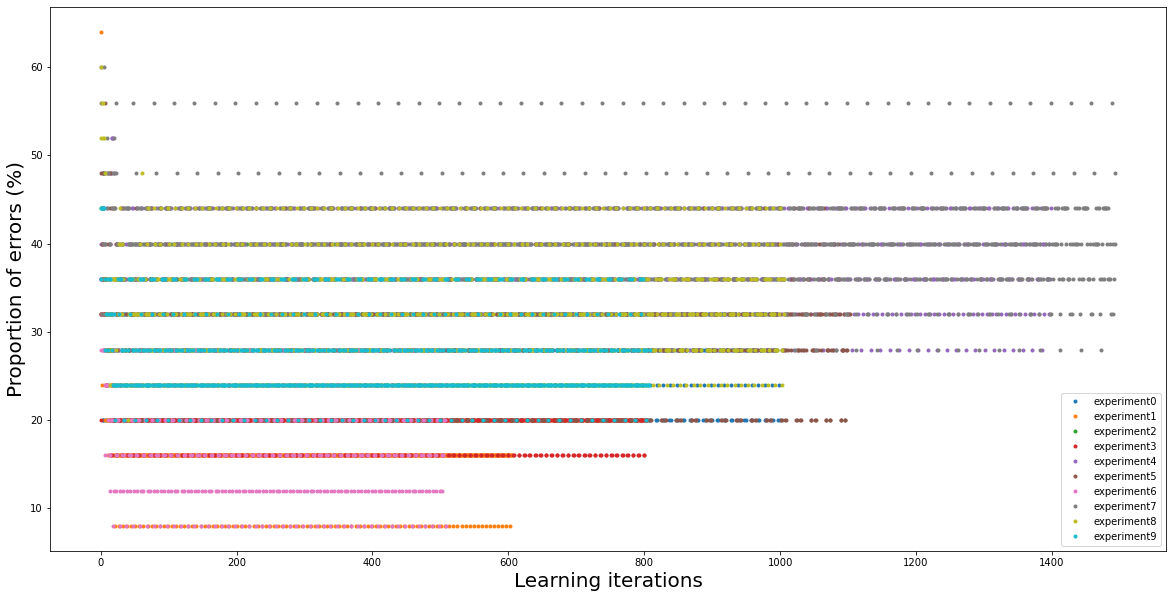



N= 500  :
For N= 500  , Experience with random seed  0   --- Minimal Proportion of errors : 16.0 %
For N= 500  , Experience with random seed  1   --- Minimal Proportion of errors : 16.0 %
For N= 500  , Experience with random seed  2   --- Minimal Proportion of errors : 24.0 %
For N= 500  , Experience with random seed  3   --- Minimal Proportion of errors : 24.0 %
For N= 500  , Experience with random seed  4   --- Minimal Proportion of errors : 20.0 %
For N= 500  , Experience with random seed  5   --- Minimal Proportion of errors : 28.0 %
For N= 500  , Experience with random seed  6   --- Minimal Proportion of errors : 24.0 %
For N= 500  , Experience with random seed  7   --- Minimal Proportion of errors : 24.0 %
For N= 500  , Experience with random seed  8   --- Minimal Proportion of errors : 28.0 %
For N= 500  , Experience with random seed  9   --- Minimal Proportion of errors : 28.0 %


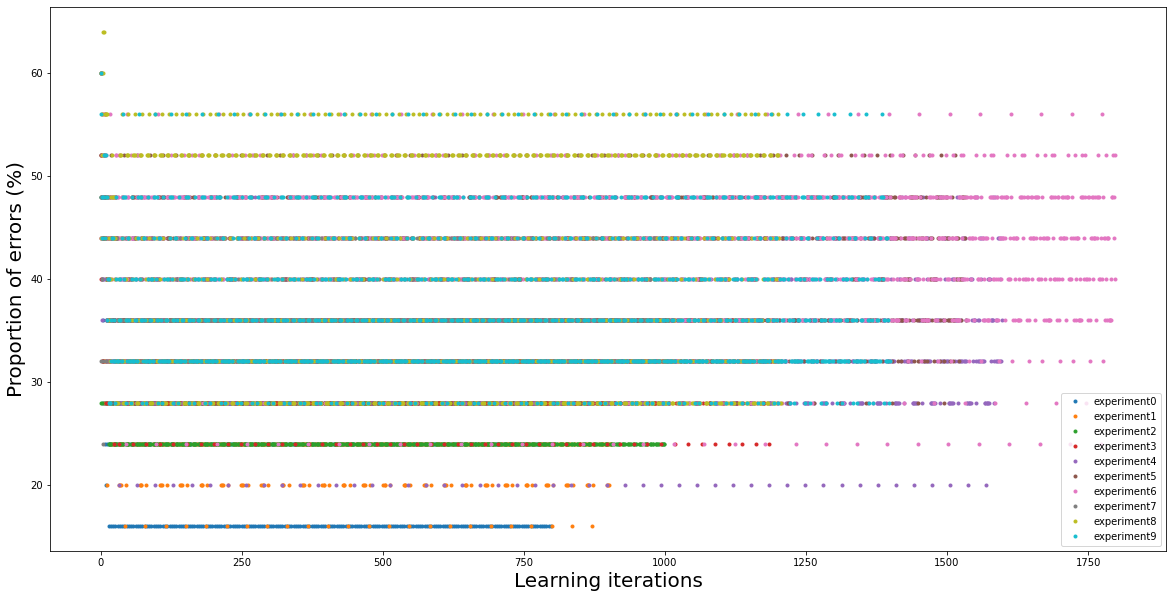



N= 1000  :
For N= 1000  , Experience with random seed  0   --- Minimal Proportion of errors : 20.0 %
For N= 1000  , Experience with random seed  1   --- Minimal Proportion of errors : 16.0 %
For N= 1000  , Experience with random seed  2   --- Minimal Proportion of errors : 16.0 %
For N= 1000  , Experience with random seed  3   --- Minimal Proportion of errors : 28.0 %
For N= 1000  , Experience with random seed  4   --- Minimal Proportion of errors : 12.0 %
For N= 1000  , Experience with random seed  5   --- Minimal Proportion of errors : 16.0 %
For N= 1000  , Experience with random seed  6   --- Minimal Proportion of errors : 24.0 %
For N= 1000  , Experience with random seed  7   --- Minimal Proportion of errors : 28.0 %
For N= 1000  , Experience with random seed  8   --- Minimal Proportion of errors : 24.0 %
For N= 1000  , Experience with random seed  9   --- Minimal Proportion of errors : 20.0 %


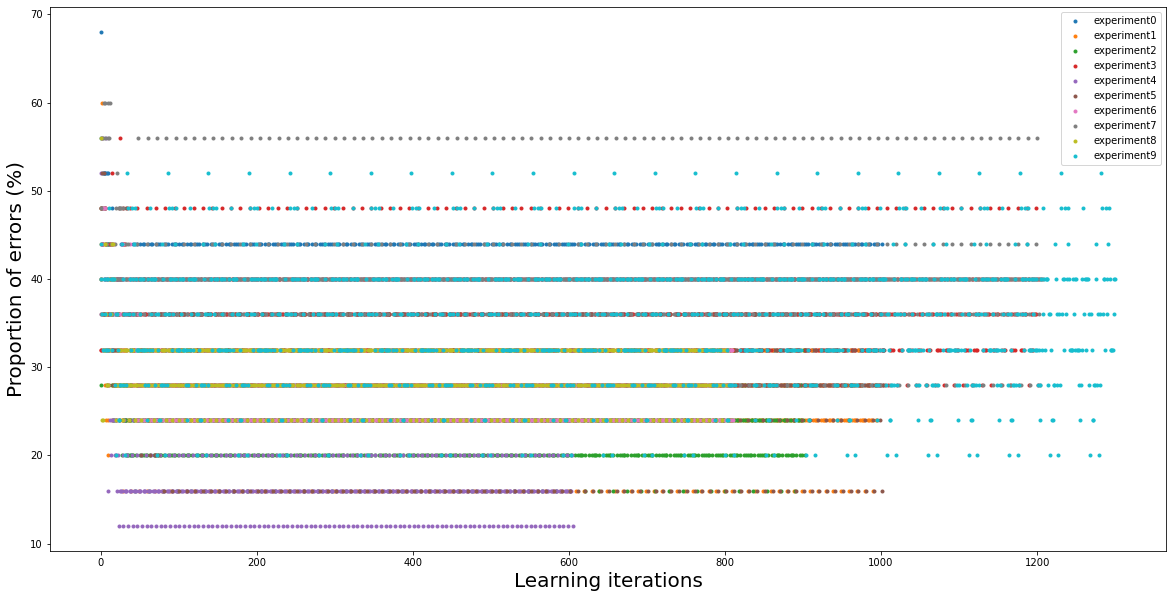



N= 2000  :
For N= 2000  , Experience with random seed  0   --- Minimal Proportion of errors : 32.0 %
For N= 2000  , Experience with random seed  1   --- Minimal Proportion of errors : 12.0 %
For N= 2000  , Experience with random seed  2   --- Minimal Proportion of errors : 24.0 %
For N= 2000  , Experience with random seed  3   --- Minimal Proportion of errors : 36.0 %
For N= 2000  , Experience with random seed  4   --- Minimal Proportion of errors : 24.0 %
For N= 2000  , Experience with random seed  5   --- Minimal Proportion of errors : 24.0 %
For N= 2000  , Experience with random seed  6   --- Minimal Proportion of errors : 24.0 %
For N= 2000  , Experience with random seed  7   --- Minimal Proportion of errors : 20.0 %
For N= 2000  , Experience with random seed  8   --- Minimal Proportion of errors : 20.0 %
For N= 2000  , Experience with random seed  9   --- Minimal Proportion of errors : 24.0 %


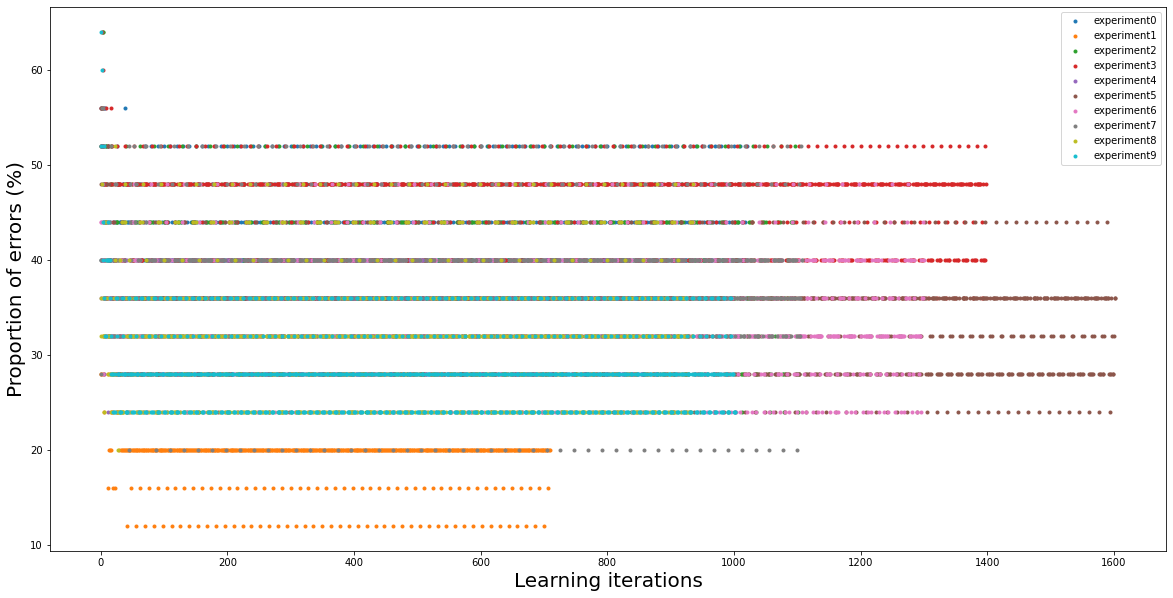



N= 5000  :
For N= 5000  , Experience with random seed  0   --- Minimal Proportion of errors : 20.0 %
For N= 5000  , Experience with random seed  1   --- Minimal Proportion of errors : 28.0 %
For N= 5000  , Experience with random seed  2   --- Minimal Proportion of errors : 20.0 %
For N= 5000  , Experience with random seed  3   --- Minimal Proportion of errors : 8.0 %
For N= 5000  , Experience with random seed  4   --- Minimal Proportion of errors : 36.0 %
For N= 5000  , Experience with random seed  5   --- Minimal Proportion of errors : 24.0 %
For N= 5000  , Experience with random seed  6   --- Minimal Proportion of errors : 16.0 %
For N= 5000  , Experience with random seed  7   --- Minimal Proportion of errors : 16.0 %
For N= 5000  , Experience with random seed  8   --- Minimal Proportion of errors : 20.0 %
For N= 5000  , Experience with random seed  9   --- Minimal Proportion of errors : 24.0 %


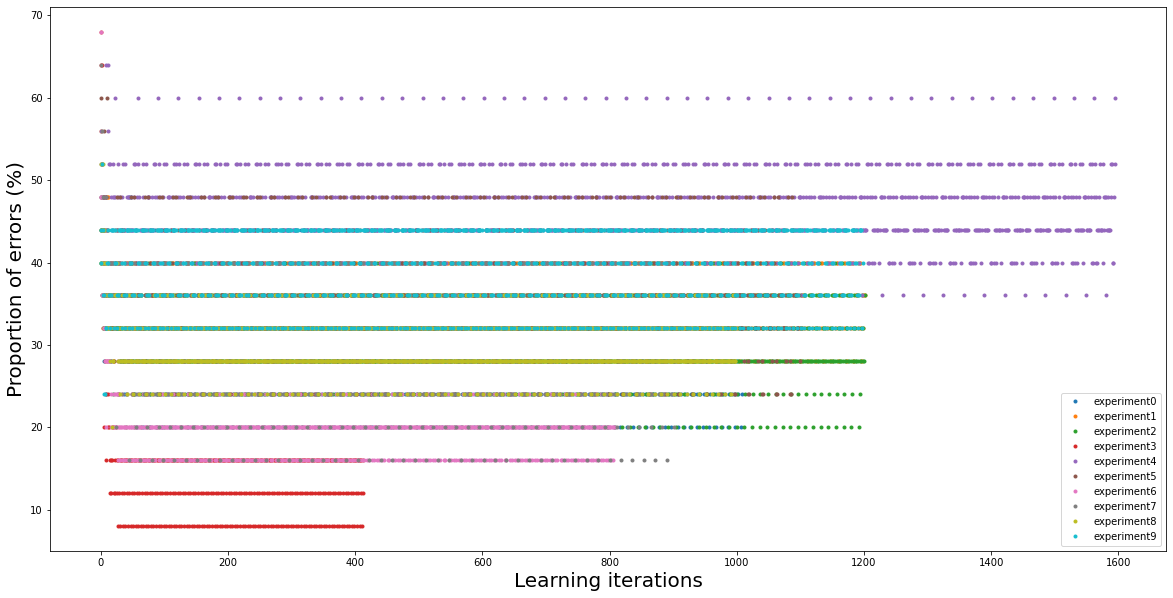



N= 10000  :
For N= 10000  , Experience with random seed  0   --- Minimal Proportion of errors : 20.0 %
For N= 10000  , Experience with random seed  1   --- Minimal Proportion of errors : 16.0 %
For N= 10000  , Experience with random seed  2   --- Minimal Proportion of errors : 12.0 %
For N= 10000  , Experience with random seed  3   --- Minimal Proportion of errors : 12.0 %
For N= 10000  , Experience with random seed  4   --- Minimal Proportion of errors : 16.0 %
For N= 10000  , Experience with random seed  5   --- Minimal Proportion of errors : 24.0 %
For N= 10000  , Experience with random seed  6   --- Minimal Proportion of errors : 20.0 %
For N= 10000  , Experience with random seed  7   --- Minimal Proportion of errors : 16.0 %
For N= 10000  , Experience with random seed  8   --- Minimal Proportion of errors : 16.0 %
For N= 10000  , Experience with random seed  9   --- Minimal Proportion of errors : 16.0 %


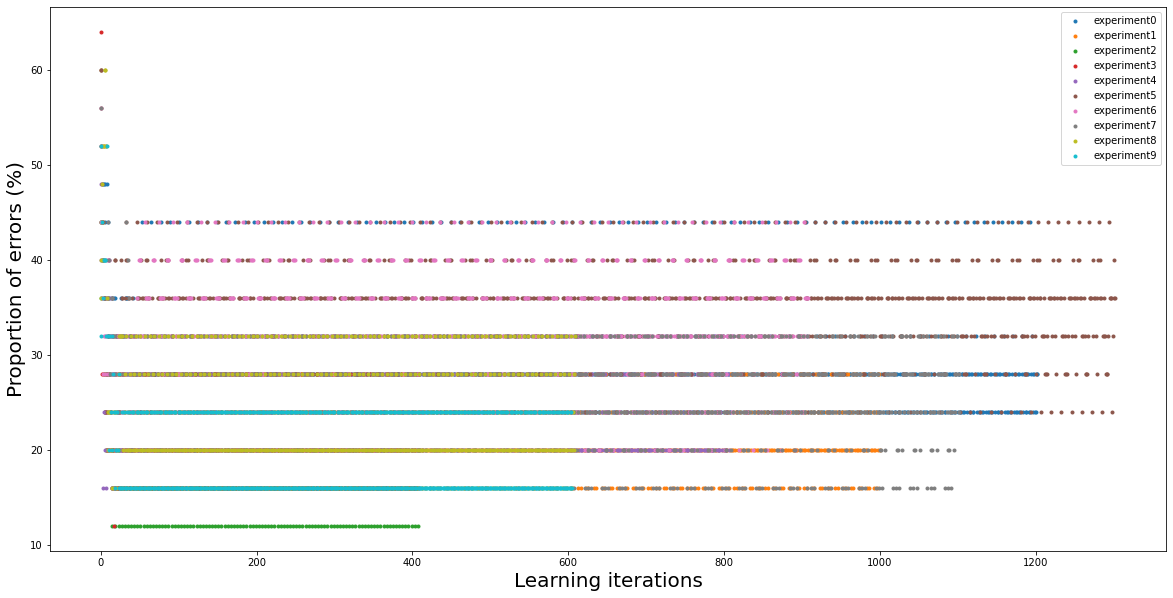



N= 20000  :
For N= 20000  , Experience with random seed  0   --- Minimal Proportion of errors : 12.0 %
For N= 20000  , Experience with random seed  1   --- Minimal Proportion of errors : 12.0 %
For N= 20000  , Experience with random seed  2   --- Minimal Proportion of errors : 20.0 %
For N= 20000  , Experience with random seed  3   --- Minimal Proportion of errors : 20.0 %
For N= 20000  , Experience with random seed  4   --- Minimal Proportion of errors : 24.0 %
For N= 20000  , Experience with random seed  5   --- Minimal Proportion of errors : 20.0 %
For N= 20000  , Experience with random seed  6   --- Minimal Proportion of errors : 24.0 %
For N= 20000  , Experience with random seed  7   --- Minimal Proportion of errors : 8.0 %
For N= 20000  , Experience with random seed  8   --- Minimal Proportion of errors : 4.0 %
For N= 20000  , Experience with random seed  9   --- Minimal Proportion of errors : 20.0 %


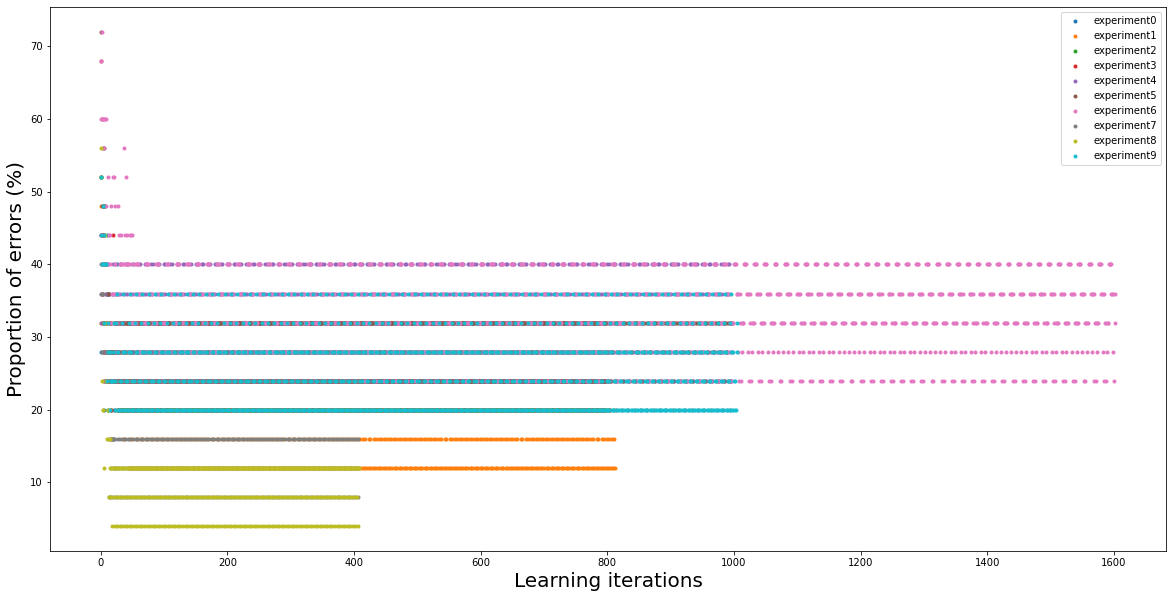

In [282]:
plt.rcParams["figure.figsize"] = (20,10)
Ns = [100,500,1000,2000,5000,10000,20000]
for N in Ns :
    print()
    print()
    print ("N=",N, " :")
    for rand in range(10):
        
        p = 5 # i.e number of data

        # Data : Input-Output generation :
        random.seed(rand)
        X_tmp = np.array([[random.choice([-1, 1]) for i in range(N)] for j in range(p**2)])
        X = np.array([np.concatenate((X_tmp[i],X_tmp[j]))for i in range(p) for j in range(p)])
        Y = np.array([random.choice([-1, 1]) for j in range(p**2)])

        # initialise weights and bias :
        np.random.seed(17)
        W_j = [np.random.normal(0,1) for i in range(2*N)]
        theta = np.random.normal(0,1)

        prop_errors = []

        learning_iter = 0   # means number where we actually perform an update
        for i in range(100) :
            for t in range(p**2) :
                y_hat = np.dot(W_j,X[t]) - theta
                if (np.sign(y_hat)!=Y[t]):
                    W_j = W_j + Y[t] * X[t]
                    theta = theta - Y[t]
                    learning_iter+=1
                    prop_errors.append(100-100*sum([np.sign(np.dot(W_j,X[j]) - theta) for j in range(p**2)]==Y)/(p**2))
        print("For N=",N, " , Experience with random seed ",rand,"  --- Minimal Proportion of errors :" , min(prop_errors),"%") 
        plt.plot(prop_errors,label="experiment"+str(rand),linestyle="none",marker='.')
        plt.legend()
        plt.xlabel("Learning iterations",size=20)
        plt.ylabel("Proportion of errors (%)",size=20)
    plt.show()
          



# (d) Let's fix N=100 and vary p :



p= 5  :
For p= 5  , Experience with random seed  0   --- Minimal Proportion of errors : 20.0 %
For p= 5  , Experience with random seed  1   --- Minimal Proportion of errors : 8.0 %
For p= 5  , Experience with random seed  2   --- Minimal Proportion of errors : 20.0 %
For p= 5  , Experience with random seed  3   --- Minimal Proportion of errors : 16.0 %
For p= 5  , Experience with random seed  4   --- Minimal Proportion of errors : 28.0 %
For p= 5  , Experience with random seed  5   --- Minimal Proportion of errors : 20.0 %
For p= 5  , Experience with random seed  6   --- Minimal Proportion of errors : 8.0 %
For p= 5  , Experience with random seed  7   --- Minimal Proportion of errors : 28.0 %
For p= 5  , Experience with random seed  8   --- Minimal Proportion of errors : 20.0 %
For p= 5  , Experience with random seed  9   --- Minimal Proportion of errors : 20.0 %


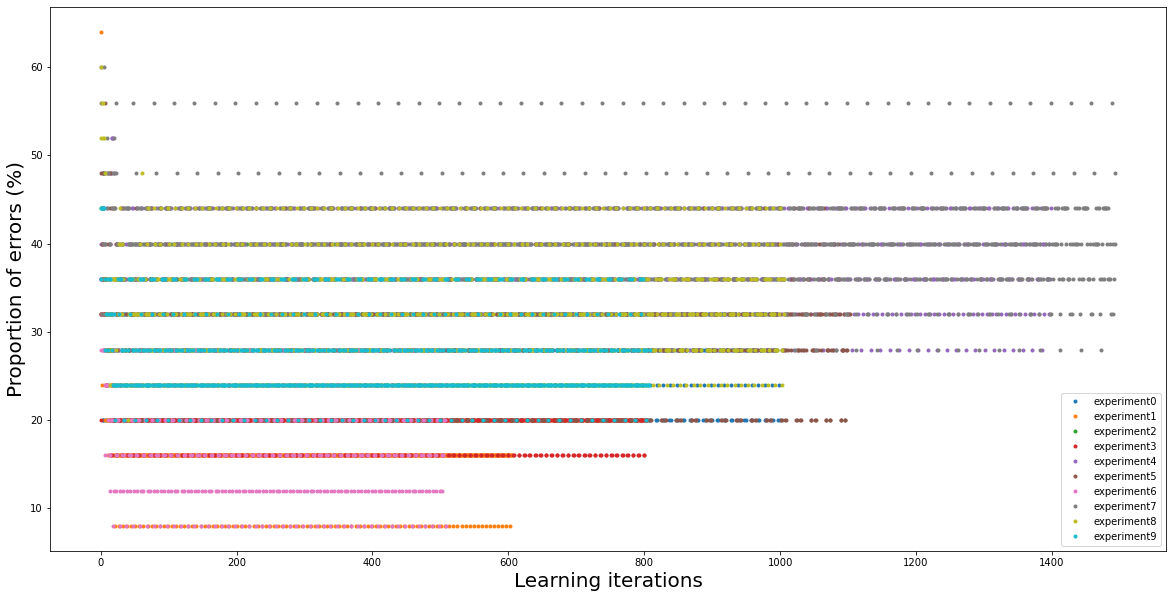



p= 10  :
For p= 10  , Experience with random seed  0   --- Minimal Proportion of errors : 33.0 %
For p= 10  , Experience with random seed  1   --- Minimal Proportion of errors : 25.0 %
For p= 10  , Experience with random seed  2   --- Minimal Proportion of errors : 37.0 %
For p= 10  , Experience with random seed  3   --- Minimal Proportion of errors : 26.0 %
For p= 10  , Experience with random seed  4   --- Minimal Proportion of errors : 32.0 %
For p= 10  , Experience with random seed  5   --- Minimal Proportion of errors : 32.0 %
For p= 10  , Experience with random seed  6   --- Minimal Proportion of errors : 24.0 %
For p= 10  , Experience with random seed  7   --- Minimal Proportion of errors : 29.0 %
For p= 10  , Experience with random seed  8   --- Minimal Proportion of errors : 28.0 %
For p= 10  , Experience with random seed  9   --- Minimal Proportion of errors : 29.0 %


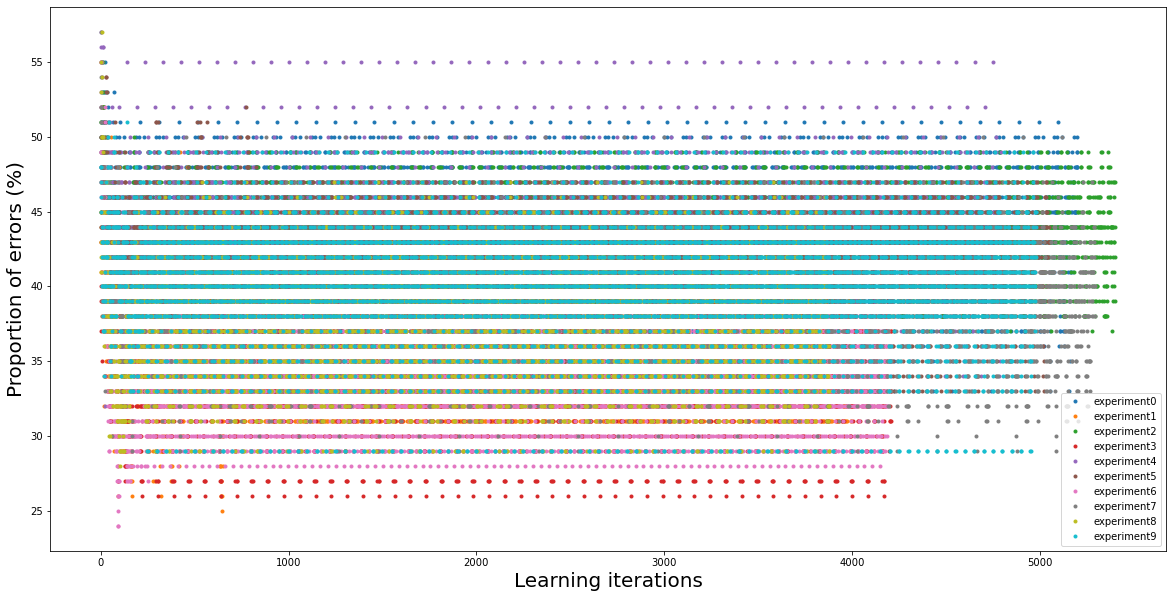



p= 15  :
For p= 15  , Experience with random seed  0   --- Minimal Proportion of errors : 31.555555555555557 %
For p= 15  , Experience with random seed  1   --- Minimal Proportion of errors : 35.55555555555556 %
For p= 15  , Experience with random seed  2   --- Minimal Proportion of errors : 34.22222222222223 %
For p= 15  , Experience with random seed  3   --- Minimal Proportion of errors : 35.55555555555556 %
For p= 15  , Experience with random seed  4   --- Minimal Proportion of errors : 39.111111111111114 %
For p= 15  , Experience with random seed  5   --- Minimal Proportion of errors : 35.55555555555556 %
For p= 15  , Experience with random seed  6   --- Minimal Proportion of errors : 35.55555555555556 %
For p= 15  , Experience with random seed  7   --- Minimal Proportion of errors : 30.22222222222223 %
For p= 15  , Experience with random seed  8   --- Minimal Proportion of errors : 36.44444444444444 %
For p= 15  , Experience with random seed  9   --- Minimal Proportion of errors

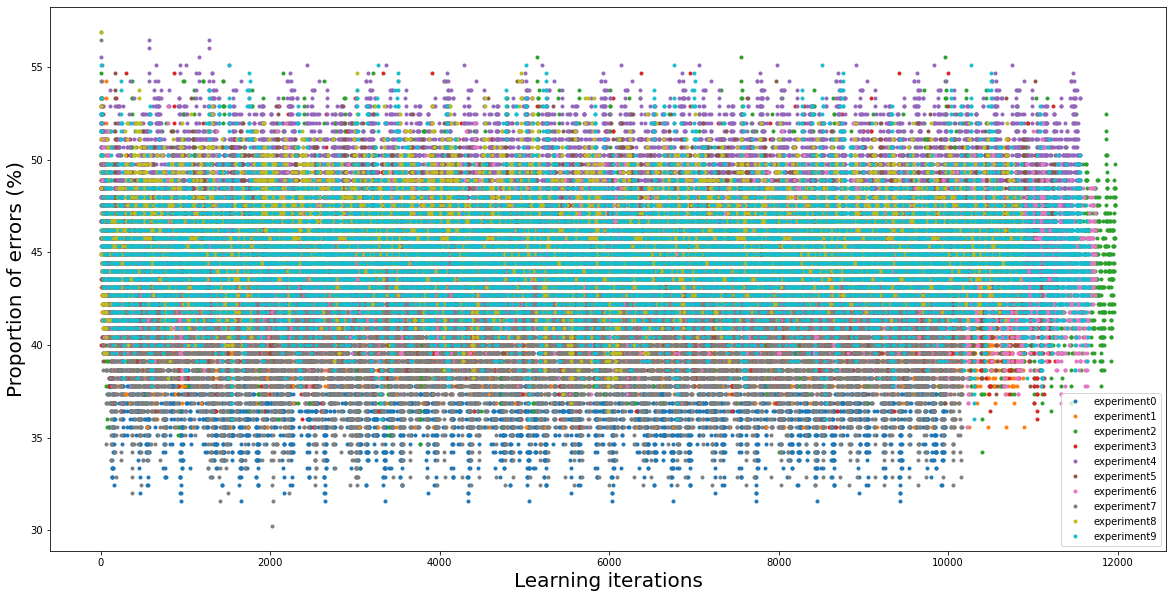



p= 20  :
For p= 20  , Experience with random seed  0   --- Minimal Proportion of errors : 36.0 %
For p= 20  , Experience with random seed  1   --- Minimal Proportion of errors : 37.25 %
For p= 20  , Experience with random seed  2   --- Minimal Proportion of errors : 37.25 %
For p= 20  , Experience with random seed  3   --- Minimal Proportion of errors : 38.25 %
For p= 20  , Experience with random seed  4   --- Minimal Proportion of errors : 39.75 %
For p= 20  , Experience with random seed  5   --- Minimal Proportion of errors : 34.5 %
For p= 20  , Experience with random seed  6   --- Minimal Proportion of errors : 37.0 %
For p= 20  , Experience with random seed  7   --- Minimal Proportion of errors : 36.5 %
For p= 20  , Experience with random seed  8   --- Minimal Proportion of errors : 37.25 %
For p= 20  , Experience with random seed  9   --- Minimal Proportion of errors : 35.25 %


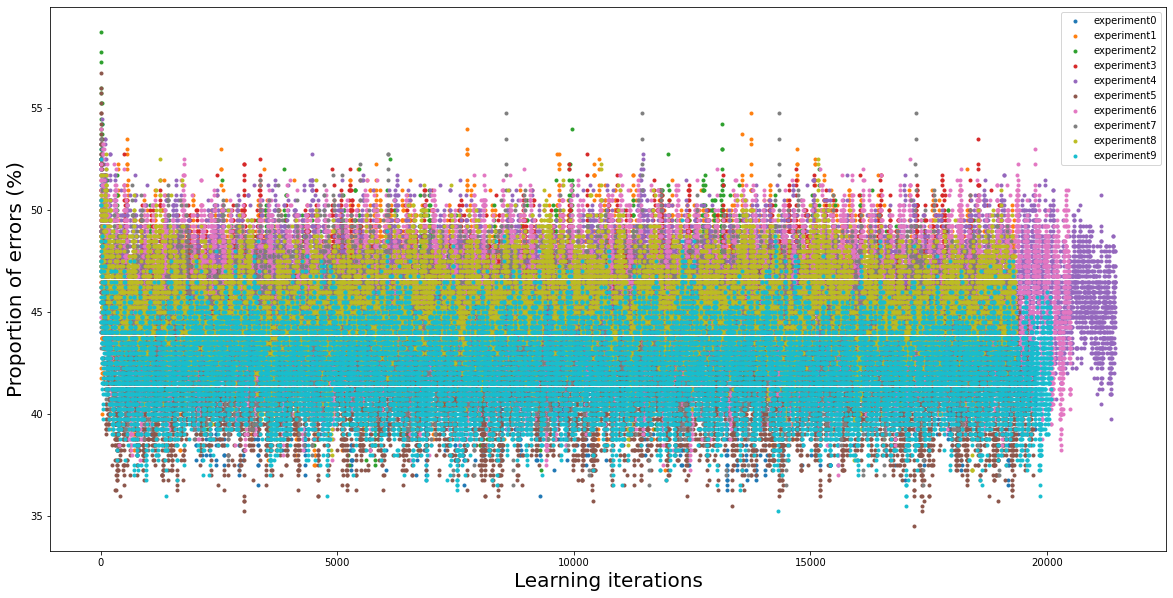

In [294]:
plt.rcParams["figure.figsize"] = (20,10)
ps = [5,10,15,20]
for p in ps :
    print()
    print()
    print ("p=",p, " :")
    for rand in range(10):
        N=100 # fixed


        # Data : Input-Output generation :
        random.seed(rand)
        X_tmp = np.array([[random.choice([-1, 1]) for i in range(N)] for j in range(p**2)])
        X = np.array([np.concatenate((X_tmp[i],X_tmp[j]))for i in range(p) for j in range(p)])
        Y = np.array([random.choice([-1, 1]) for j in range(p**2)])

        # initialise weights and bias :
        np.random.seed(17)
        W_j = [np.random.normal(0,1) for i in range(2*N)]
        theta = np.random.normal(0,1)

        prop_errors = []

        learning_iter = 0   # means number where we actually perform an update
        for i in range(100) :
            for t in range(p**2) :
                y_hat = np.dot(W_j,X[t]) - theta
                if (np.sign(y_hat)!=Y[t]):
                    W_j = W_j + Y[t] * X[t]
                    theta = theta - Y[t]
                    learning_iter+=1
                    prop_errors.append(100-100*sum([np.sign(np.dot(W_j,X[j]) - theta) for j in range(p**2)]==Y)/(p**2))
        print("For p=",p, " , Experience with random seed ",rand,"  --- Minimal Proportion of errors :" , min(prop_errors),"%") 
        plt.plot(prop_errors,label="experiment"+str(rand),linestyle="none",marker='.')
        plt.legend()
        plt.xlabel("Learning iterations",size=20)
        plt.ylabel("Proportion of errors (%)",size=20)
    plt.show()
          



# Question 3:

# (a)

## If x1 > 0, w1 < 0, and x3 < y :

## Let's assume  we increase w2 i.e w2' > w2 :

 ## We  will have : w2' w1 x1 < w2 w1 x1  < y
 
 ##   -w2' w1 x1 > - w2 w1 x1 > - y
  
 ##  y - w2' w1 x1 > y - w2 w1 x1 > 0
  
 ##  l' > l > 0
 
 ## Therefore we should decrease  w2
 
 ## Now , let's assume we increase w1 i.e w1' > w1 :
 

# (b)

## $\frac{ \partial l} {\partial x_3} = 0.5 * 2 *(-1) (y-x_3)=x_3-y= w_2 w_1 x_1 - y$

## $\frac{ \partial l} {\partial w_2} = \frac{ \partial l} {\partial x_3} * \frac{ \partial x_3} {\partial w_2} = (x_3-y)*x_2 = (w_2 w_1 x_1 - y)*x_2 = (w_2 w_1 x_1 - y)* w_1 x_1$

## $\frac{ \partial l} {\partial x_2} = \frac{ \partial l} {\partial x_3} * \frac{ \partial x_3} {\partial x_2} = (x_3-y)*w_2 = (w_2 w_1 x_1 - y)*w_2 $

## $\frac{ \partial l} {\partial w_1} = \frac{ \partial l} {\partial x_2} * \frac{ \partial x_2} {\partial w_1} = (x_3-y)*w_2 * x_1 = (w_2 w_1 x_1 - y)*w_2 * x_1 $

# (c) Update rule :

## Initialise $w_1(0)= 0.1, w_2(0)= 0.1$ for example

## t=0

## While $l(y,x_3) > \epsilon $ :

## - $w_1 (t+1) = w_1(t) - \alpha \frac{ \partial l} {\partial w_1} = w_1(t) - \alpha * (w_2(t) w_1(t) x_1-y)*w_2(t) * x_1$

## - $w_2 (t+1) = w_2(t) - \alpha \frac{ \partial l} {\partial w_2} = w_2(t) - \alpha * (w_2(t) w_1(t) x_1-y)*w_1(t) x_1$

## t = t+1

## where $\alpha$ is the learning rate and can be set to values such as 0.01

# Question 4:

# (a) like (Q3.b)

## $x_3 = w_2 \sigma(w_1x_1)$ and $ l = 0.5*(y-x_3)^2 $

## $\frac{ \partial l} {\partial x_3} = 0.5 * 2 *(-1) (y-x_3)=x_3-y= w_2 \sigma (w_1 x_1) - y$

## $\frac{ \partial l} {\partial w_2} = \frac{ \partial l} {\partial x_3} * \frac{ \partial x_3} {\partial w_2} = (x_3-y)*x_2 = (w_2 \sigma(w_1 x_1) - y)*x_2 = (w_2 \sigma(w_1 x_1) - y)* \sigma(w_1 x_1)$


## $\frac{ \partial l} {\partial x_2} = \frac{ \partial l} {\partial x_3} * \frac{ \partial x_3} {\partial x_2} = (x_3-y)*w_2 = (w_2 \sigma(w_1 x_1) - y)*w_2 $

## $\frac{ \partial l} {\partial w_1} = \frac{ \partial l} {\partial x_2} * \frac{ \partial x_2} {\partial w_1} = (x_3-y)*w_2 * x_1 \sigma '(w_1x_1) = (w_2 \sigma(w_1 x_1) - y)*w_2 * x_1 \sigma '(w_1x_1) $

# (b) (ReLU), σ(x) = max(0, x)

## If $w_1 x_1 >0$ i.e $w_1$ and $x_1$ have same signs : $\sigma (w_1x_1)=w_1 x_1$ and $\sigma'=1$ . Therefore :

## $\frac{ \partial l} {\partial w_1} =  (w_2 \sigma(w_1 x_1) - y)*w_2 * x_1 \sigma '(w_1x_1)  = (w_2 w_1 x_1 - y) *w_2 *x_1 $ 

## $\frac{ \partial l} {\partial w_2} =  (w_2 w_1 x_1 - y)* w_1 x_1$


## If $w_1 x_1 \leq 0$ i.e $w_1$ and $x_1$ have opposite signs or $w_1 x_1=0$ : $\sigma (w_1x_1)=0$ and $\sigma'=0$ . Therefore :

## $\frac{ \partial l} {\partial w_1} = 0 $ 

## $\frac{ \partial l} {\partial w_2} = 0 $ 



## This is a big problem because if $w_1 x_1\leq 0$, we do not update the gradient anymore and therefore we are not learning : this is what we call the dead relu problem.
    
## In order to solve this problem, the machine learning community came up with a very similar function : Leaky Relu adding a slight slope to the negative range to prevent the dying Relu.
## The formula is :  $f(x)=1_{(x<0)}(αx)+1_{(x\geq0)}(x)$